<br>
# ** 5-2 Finance Analysis - VaR**
파이썬을 활용한 금융분석

<br><br>
## **1 데이터 불러오기**
Golden Cross / Death Cross

### **01 Pandas_datareader**
> **from** &nbsp;&nbsp;  pandas_datareader &nbsp;&nbsp; **import** &nbsp;&nbsp; get_data_yahoo

In [1]:
from pandas_datareader import get_data_yahoo
start_date = '2013-01-01'
codes = ['KO', 'MS', '005930.KS', '000660.KS']
result = {}
for code in codes:
    result[code] = get_data_yahoo(code, start_date).Close

In [2]:
import pandas as pd
prices = pd.DataFrame(result)
prices = prices.fillna(method='ffill')
prices = prices.dropna()
prices.tail(3)

,KO,MS,005930.KS,000660.KS
Date,,,,
2018-06-06,43.459999,51.910000,51300.0,91000.0
2018-06-07,43.439999,52.139999,50600.0,90900.0
2018-06-08,43.950001,51.910000,49650.0,88400.0


<br>
### **02 주가간의 상관계수 분석**

In [3]:
prices_corr = prices.pct_change().dropna().corr()
prices_corr

,KO,MS,005930.KS,000660.KS
KO,1.000000,0.277815,0.041531,0.037774
MS,0.277815,1.000000,0.074338,0.099131
005930.KS,0.041531,0.074338,1.000000,0.343244
000660.KS,0.037774,0.099131,0.343244,1.000000


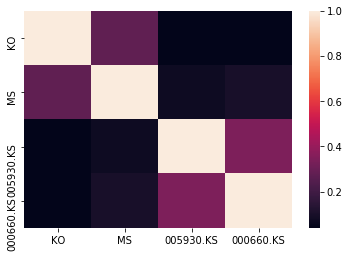

In [4]:
%matplotlib inline
import seaborn as sns
sns.heatmap(prices_corr)

<br><br>
## **2 Value At Risk**
일일손실확률과 표준편차를 사용하여, 해당종목의 오차범위내 최대 손실금액

In [5]:
# 초기자본금
p = 10e6
p

10000000.0

In [6]:
# 신뢰구간
c = 0.99

In [7]:
import pandas as pd
import numpy as np

In [8]:
prices.head(3)

,KO,MS,005930.KS,000660.KS
Date,,,,
2013-01-02,37.599998,19.620001,31520.0,26600.0
2013-01-03,37.599998,19.580000,30860.0,26650.0
2013-01-04,37.660000,20.190001,30500.0,26350.0


In [9]:
price = prices['000660.KS']

In [10]:
# 가격 변화의 평균
mu = np.mean(price)
mu

45547.62242725337

In [11]:
# 고정변동성
sigma = np.std(price)
sigma

17429.870828984025

In [12]:
from scipy.stats import norm

In [13]:
# 초과수익률
alpha = norm.ppf(1-c, mu, sigma)
alpha

4999.6794794399175

In [14]:
def var_cov_var_one(P, c, prices):
    import numpy as np
    import pandas as pd
    from scipy.stats import norm
    
    result = []
    codes = prices.columns
    mu     = np.mean(price)
    sigma  = np.std(price)
    alpha  = norm.ppf( 1-c , mu , sigma )
    var    = P - P * ( alpha + 1 )
    return code, round(var, 2), round(var/P * 100, 2)

In [15]:
df = var_cov_var_one(p,c,prices)
df

('000660.KS', -49996794794.4, -499967.95)

<br><br>
## **3 모든 종목의 VaR 계산**
DataFrame

In [16]:
P    = 1e6                     # 1,000,000 원 (초기자금)
c    = 0.99                    # 99% 신뢰구간 (confidence interval)

In [17]:
def var_cov_var(P, c, prices):
    import numpy as np
    import pandas as pd
    from scipy.stats import norm
    
    result = []
    for code in prices.columns:
        price  = prices[code].pct_change()
        mu     = np.mean(price)
        sigma  = np.std(price)
        alpha  = norm.ppf( 1-c , mu , sigma )
        var    = P - P * ( alpha + 1 )
        result.append([code, c, round(var, 2), round(var/P * 100, 2)])

    df         = pd.DataFrame(result)
    df.columns = ['Code' ,'신뢰구간', '최대손실금액 (Value at Risk)', '리스크 비율']
    df         = df.sort_values('리스크 비율', ascending=True)
    return df

In [18]:
df = var_cov_var(P,c,prices)
df = df.sort_values('리스크 비율')
df

,Code,신뢰구간,최대손실금액 (Value at Risk),리스크 비율
0,KO,0.99,20095.92,2.01
2,005930.KS,0.99,36212.56,3.62
1,MS,0.99,37318.78,3.73
3,000660.KS,0.99,46795.39,4.68
